S Tse
9/5/19

Notebook exploring building params vs loss ratio

In [1]:
from __future__ import print_function
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt
import os
import fiona
import contextily as ctx
import seaborn as sns
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets

os.environ['PROJ_LIB']=r"C:\Users\Scott\Anaconda3\Library\share" # needed for my env
pd.set_option('display.max_columns', None)  
pd.set_option('display.expand_frame_repr', False)
pd.set_option('max_colwidth', -1)

In [2]:
#load data as dataframe
aebm_cascadia = pd.read_excel('../data/raw/HazusAEBM_CascadiaResults.xlsx')

In [3]:
#load extra data provided by Doug with building params in individual fields
extra_data = pd.read_excel('../data/raw//AEBM_InventoryTillamook.xlsx')

In [4]:
extra_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27371 entries, 0 to 27370
Data columns (total 30 columns):
eqAebmId                 27371 non-null object
Occupancy                27371 non-null object
SoilType                 27371 non-null object
LqfSusCat                27371 non-null int64
LndSusCat                27371 non-null int64
WaterDepth               27371 non-null int64
eqBldgType               27371 non-null object
DesignLevel              27371 non-null object
ShakeMap                 0 non-null float64
ProfileName              27371 non-null object
Name                     27371 non-null object
Tract                    0 non-null float64
Address                  0 non-null float64
City                     0 non-null float64
State                    0 non-null float64
Zipcode                  0 non-null float64
DayOccupants             27371 non-null int64
NightOccupants           27371 non-null int64
BldgArea                 27371 non-null int64
BldgValue             

In [5]:
#grab needed columns
building_columns = extra_data[['Name', 'Occupancy', 'eqBldgType', 'DesignLevel']]

In [6]:
aebm_cascadia.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27371 entries, 0 to 27370
Data columns (total 80 columns):
eqAebmId      27371 non-null object
Name          27371 non-null object
ProfileNam    27371 non-null object
Tract         27371 non-null int64
Address       0 non-null float64
City          0 non-null float64
State         0 non-null float64
Zipcode       0 non-null float64
DayOccupan    27371 non-null int64
NightOccup    27371 non-null int64
BldgArea      27371 non-null int64
BldgValue     27371 non-null int64
ContentVal    27371 non-null float64
BusinessIn    27371 non-null int64
Business_1    27371 non-null int64
WagesPaid     27371 non-null int64
Relocation    27371 non-null int64
RentalCost    27371 non-null int64
RatioOwner    27371 non-null int64
Latitude      27371 non-null float64
Longitude     27371 non-null float64
Comment       0 non-null float64
ESRI_OID      27371 non-null int64
eqAebmId_1    27371 non-null object
Foundation    0 non-null float64
SoilType      2737

In [7]:
aebm_cascadia = aebm_cascadia.merge(building_columns, on='Name', how='left')
aebm_cascadia.head()

,eqAebmId,Name,ProfileNam,Tract,Address,City,State,Zipcode,DayOccupan,NightOccup,BldgArea,BldgValue,ContentVal,BusinessIn,Business_1,WagesPaid,Relocation,RentalCost,RatioOwner,Latitude,Longitude,Comment,ESRI_OID,eqAebmId_1,Foundation,SoilType,LqfSusCat,LndSusCat,WaterDepth,Distance,Intersecti,Intersec_1,Intersec_2,PGA,PGV,Sa03,Sa10,LqfSettlPG,LqfSprPGD,LqfProb,LndProb,LndPGD,SufFltRupt,SurfFltRup,StrPDsNone,StrPDsSlig,StrPDsMode,StrPDsExte,StrPDsComp,NsaPDsNone,NsaPDsSlig,NsaPDsMode,NsaPDsExte,NsaPDsComp,NsdPDsNone,NsdPDsSlig,NsdPDsMode,NsdPDsExte,NsdPDsComp,CasDayLvl1,CasDayLvl2,CasDayLvl3,CasDayLvl4,CasNightLv,CasNight_1,CasNight_2,CasNight_3,LossStruct,LossNonStr,LossNonS_1,LossConten,LossBusInv,LossTotalB,LossReloca,LossRental,LossBusInc,LossWage,LossTotBus,LossTotEco,ESRI_OID_1,Occupancy,eqBldgType,DesignLevel
0,OR000001,OR001008,RES1W1HC0,41057960100,NaN,NaN,NaN,NaN,0,1,1098,96600,48300.0,0,0,0,0,0,0,45.695665,-123.809382,NaN,10823,OR000001,NaN,D,3,1,0,0,0.535203,0.381839,0.437532,0.326145,11.4215,0.739075,0.306425,0.2,31.9505,0.1,0.00,0.00000,2787.19,0.5,0.4195,0.3902,0.0863,0.0831,0.0206,0.3335,0.3358,0.1890,0.1184,0.0230,0.4212,0.2669,0.1929,0.0944,0.0243,0.000000,0.000000,0.000000,0.000000,0.002488,0.000432,0.000021,0.000034,1785.0714,4642.9824,2161.1352,2603.7564,0,11192.9454,0,0,0,0,0,11192.9454,10323,RES1,W1,HC
1,OR000002,OR001009,AGR1S3PC0,41057960100,NaN,NaN,NaN,NaN,5,0,1440,22640,22600.0,0,0,0,0,0,0,45.694994,-123.818328,NaN,21853,OR000002,NaN,C,0,7,0,0,3.977800,0.265112,0.200000,0.330225,11.5821,0.749615,0.310760,0.0,0.0000,0.0,0.15,5.51101,2787.19,0.5,0.0153,0.0225,0.1477,0.3750,0.4393,0.1640,0.1949,0.1087,0.1942,0.3379,0.0252,0.0498,0.2279,0.2575,0.4393,0.153172,0.036545,0.002209,0.003527,0.000000,0.000000,0.000000,0.000000,6714.0233,1028.6326,4281.9236,5082.3784,0,17106.9579,0,0,0,0,0,17106.9579,21846,AGR1,S3,PC
2,OR000003,OR001010,RES1W1MC0,41057960100,NaN,NaN,NaN,NaN,1,2,2220,129056,64500.0,0,0,0,0,0,0,45.689002,-123.818460,NaN,15205,OR000003,NaN,D,3,1,0,0,0.584801,0.371591,0.413808,0.329375,11.5486,0.747405,0.309825,0.2,32.7686,0.1,0.00,0.00000,2787.19,0.5,0.3834,0.3468,0.1543,0.0916,0.0237,0.2619,0.3399,0.2352,0.1385,0.0242,0.3871,0.2661,0.2190,0.0966,0.0310,0.002909,0.000510,0.000025,0.000039,0.005818,0.001020,0.000049,0.000078,2780.6277,6873.6516,3299.5877,3991.5180,0,16945.3850,0,0,0,0,0,16945.3850,14832,RES1,W1,MC
3,OR000004,OR001011,RES1W1LC0,41057960100,NaN,NaN,NaN,NaN,0,1,1040,60459,30200.0,0,0,0,0,0,0,45.689002,-123.818460,NaN,7196,OR000004,NaN,D,3,1,0,0,0.823160,0.355740,0.382105,0.329375,11.5486,0.747405,0.309825,0.2,32.7686,0.1,0.00,0.00000,2787.19,0.5,0.2663,0.3335,0.2398,0.1333,0.0268,0.1878,0.3237,0.2895,0.1676,0.0312,0.2749,0.2479,0.2922,0.1343,0.0504,0.000000,0.000000,0.000000,0.000000,0.003721,0.000626,0.000028,0.000044,1756.3460,4586.6616,1882.8263,2271.4024,0,10497.2363,0,0,0,0,0,10497.2363,6816,RES1,W1,LC
4,OR000005,OR001012,AGR1S3LC0,41057960100,NaN,NaN,NaN,NaN,2,0,576,33485,33400.0,0,0,0,0,0,0,45.689002,-123.818460,NaN,16188,OR000005,NaN,D,3,1,0,0,2.812460,0.264688,0.200000,0.329375,11.5486,0.747405,0.309825,0.2,32.7686,0.1,0.00,0.00000,2787.19,0.5,0.0430,0.0631,0.2525,0.4180,0.2231,0.2387,0.2829,0.1575,0.1474,0.1733,0.0480,0.1049,0.3531,0.2706,0.2231,0.036428,0.007968,0.000453,0.000721,0.000000,0.000000,0.000000,0.000000,7090.4488,1014.1368,3674.6673,4482.4136,0,16261.6665,0,0,0,0,0,16261.6665,15834,AGR1,S3,LC


In [8]:
keep_columns = ['Name',
                'Tract',
                'Occupancy',
                'eqBldgType',
                'DesignLevel',
                'BldgValue', 
                'LossStruct',
                'LossNonStr',
                'LossNonS_1',
                'LossConten',
                'ContentVal',
                'CasDayLvl1',
                'CasDayLvl2',
                'CasDayLvl3',
                'CasDayLvl4',
                'CasNight_1',
                'CasNight_2',
                'CasNight_3',
                'CasNightLv',
                'geometry'
               ]

In [9]:
# convert from df to geodataframe
aebm_cascadia_gdf = gpd.GeoDataFrame(
    aebm_cascadia, geometry=gpd.points_from_xy(aebm_cascadia.Longitude, aebm_cascadia.Latitude))

In [10]:
aebm_cascadia_gdf = aebm_cascadia_gdf[keep_columns]

In [11]:
aebm_cascadia_gdf.head(5)

,Name,Tract,Occupancy,eqBldgType,DesignLevel,BldgValue,LossStruct,LossNonStr,LossNonS_1,LossConten,ContentVal,CasDayLvl1,CasDayLvl2,CasDayLvl3,CasDayLvl4,CasNight_1,CasNight_2,CasNight_3,CasNightLv,geometry
0,OR001008,41057960100,RES1,W1,HC,96600,1785.0714,4642.9824,2161.1352,2603.7564,48300.0,0.000000,0.000000,0.000000,0.000000,0.000432,0.000021,0.000034,0.002488,POINT (-123.809382 45.695665)
1,OR001009,41057960100,AGR1,S3,PC,22640,6714.0233,1028.6326,4281.9236,5082.3784,22600.0,0.153172,0.036545,0.002209,0.003527,0.000000,0.000000,0.000000,0.000000,POINT (-123.818328 45.694994)
2,OR001010,41057960100,RES1,W1,MC,129056,2780.6277,6873.6516,3299.5877,3991.5180,64500.0,0.002909,0.000510,0.000025,0.000039,0.001020,0.000049,0.000078,0.005818,POINT (-123.81846 45.689002)
3,OR001011,41057960100,RES1,W1,LC,60459,1756.3460,4586.6616,1882.8263,2271.4024,30200.0,0.000000,0.000000,0.000000,0.000000,0.000626,0.000028,0.000044,0.003721,POINT (-123.81846 45.689002)
4,OR001012,41057960100,AGR1,S3,LC,33485,7090.4488,1014.1368,3674.6673,4482.4136,33400.0,0.036428,0.007968,0.000453,0.000721,0.000000,0.000000,0.000000,0.000000,POINT (-123.81846 45.689002)


In [12]:
# create new column for building loss ratio
aebm_cascadia_gdf['loss_ratio'] = (aebm_cascadia_gdf.LossStruct 
                                   + aebm_cascadia_gdf.LossNonStr
                                   + aebm_cascadia_gdf.LossNonS_1)/aebm_cascadia_gdf.BldgValue

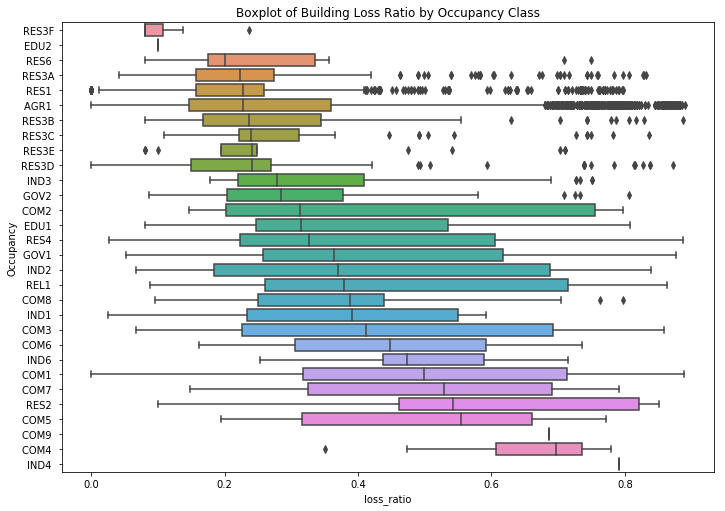

In [13]:
order = aebm_cascadia_gdf.groupby('Occupancy')['loss_ratio'].median().sort_values().index
fig, ax = plt.subplots()
fig.set_size_inches(11.7, 8.27)
ax = sns.boxplot(y="Occupancy",
            x=aebm_cascadia_gdf.loss_ratio, 
            data=aebm_cascadia_gdf,
            order=order).set_title('Boxplot of Building Loss Ratio by Occupancy Class')

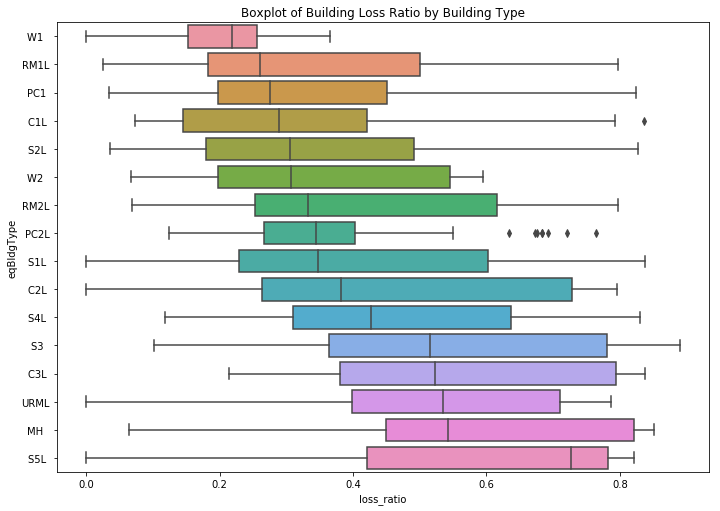

In [14]:
order = aebm_cascadia_gdf.groupby('eqBldgType')['loss_ratio'].median().sort_values().index
fig, ax = plt.subplots()
fig.set_size_inches(11.7, 8.27)
ax = sns.boxplot(y="eqBldgType",
                 x=aebm_cascadia_gdf.loss_ratio, 
                 data=aebm_cascadia_gdf,
                 order=order).set_title('Boxplot of Building Loss Ratio by Building Type')

Need to double check one more time if Loss Ratio = (LossStruct + LossNonStr + LossNonS_1)/BldgValue

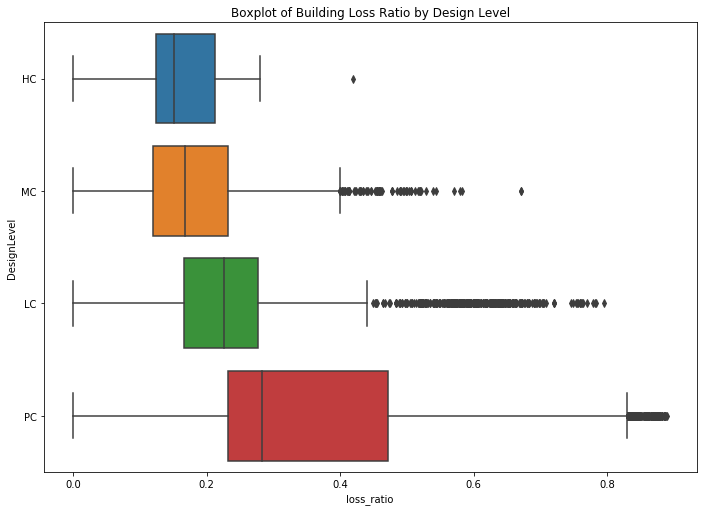

In [15]:
order = aebm_cascadia_gdf.groupby('DesignLevel')['loss_ratio'].median().sort_values().index
fig, ax = plt.subplots()
# the size of A4 paper
fig.set_size_inches(11.7, 8.27)
ax= sns.boxplot(y="DesignLevel",
            x=aebm_cascadia_gdf.loss_ratio,
            data=aebm_cascadia_gdf,
            order=order).set_title('Boxplot of Building Loss Ratio by Design Level')

In [16]:
# initialize and set crs for basemap to render
aebm_cascadia_gdf.crs = {'init': 'epsg:4326'}
aebm_cascadia_gdf = aebm_cascadia_gdf.to_crs(epsg=3857)

In [17]:
# print bounds of total map
aebm_cascadia_gdf.total_bounds

array([-13804151.97115817,   5628633.65041514, -13734201.47481145,
         5745698.7778794 ])

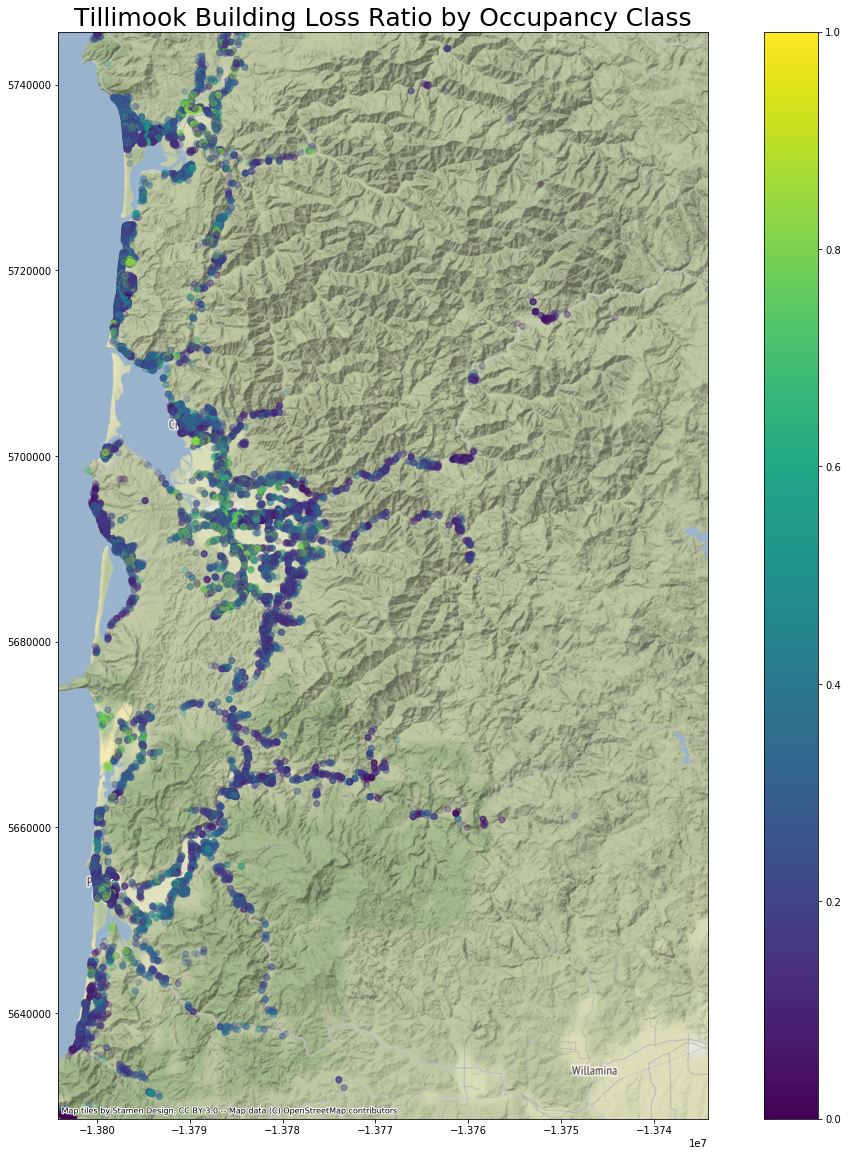

In [18]:
# static map
ax = aebm_cascadia_gdf.plot(column=aebm_cascadia_gdf.loss_ratio,
                    figsize=(20, 20),
                    alpha=0.25,
                    legend=True,
                    vmin=0,
                    vmax=1)
ax.set_xlim([aebm_cascadia_gdf.total_bounds[0],aebm_cascadia_gdf.total_bounds[2]])
ax.set_ylim([aebm_cascadia_gdf.total_bounds[1],aebm_cascadia_gdf.total_bounds[3]])
ax.set_title("Tillimook Building Loss Ratio by Occupancy Class", fontsize=25)
ctx.add_basemap(ax)

Being able to look at an impact metric such as loss ratio by occupancy class was interesting. One idea is to build a visualization of building loss ratio and allow one to filter by each of the building class/building type/ and Design Level dynamically. Could be CARD #1

In [19]:
# create arrays for widget dropdowns
occ_classes = ['All']+sorted(aebm_cascadia_gdf['Occupancy'].unique())
bldg_type = ['All']+sorted(aebm_cascadia_gdf['eqBldgType'].unique())
design_level = ['All']+sorted(aebm_cascadia_gdf['DesignLevel'].unique())

In [20]:
# map with filter
plot_output = widgets.Output()

dropdown_occ_classes = widgets.Dropdown(options = occ_classes, description='Occupancy:')
dropdown_bldg_type = widgets.Dropdown(options = bldg_type, description='Building Type:')
dropdown_design_level = widgets.Dropdown(options = design_level, description='Design Level:')

def common_filtering(occ_classes, bldg_type, design_level):
    plot_output.clear_output()
        
    if (occ_classes == 'All') & (bldg_type == 'All') & (design_level == 'All'):
        common_filter = aebm_cascadia_gdf
    elif (occ_classes == 'All') & (bldg_type == 'All'):
        common_filter = aebm_cascadia_gdf[aebm_cascadia_gdf['DesignLevel'] == design_level]    
    elif (occ_classes == 'All') & (design_level == 'All'):
        common_filter = aebm_cascadia_gdf[aebm_cascadia_gdf['eqBldgType'] == bldg_type]
    elif (bldg_type == 'All') & (design_level == 'All'):
        common_filter = aebm_cascadia_gdf[aebm_cascadia_gdf['Occupancy'] == occ_classes]
    elif (occ_classes == 'All'):
        common_filter = aebm_cascadia_gdf[(aebm_cascadia_gdf['eqBldgType'] == bldg_type) & (aebm_cascadia_gdf['DesignLevel'] == design_level)]
    elif (bldg_type == 'All'):
        common_filter = aebm_cascadia_gdf[(aebm_cascadia_gdf['Occupancy'] == occ_classes) & (aebm_cascadia_gdf['DesignLevel'] == design_level)]
    elif (design_level == 'All'):   
        common_filter = aebm_cascadia_gdf[(aebm_cascadia_gdf['Occupancy'] == occ_classes) & (aebm_cascadia_gdf['eqBldgType'] == bldg_type)]
    else:
        common_filter = aebm_cascadia_gdf[(aebm_cascadia_gdf['Occupancy'] == occ_classes) 
                                          & (aebm_cascadia_gdf['eqBldgType'] == bldg_type) 
                                          & (aebm_cascadia_gdf['DesignLevel'] == design_level)]

    with plot_output:
        fig, ax = plt.subplots()
        ax = common_filter.plot(column=common_filter.loss_ratio,
                            figsize=(20, 20),
                            alpha=0.25,
                            legend=True,
                            vmin=0,
                            vmax=1)
        
        ax.set_xlim([aebm_cascadia_gdf.total_bounds[0],aebm_cascadia_gdf.total_bounds[2]])
        ax.set_ylim([aebm_cascadia_gdf.total_bounds[1],aebm_cascadia_gdf.total_bounds[3]])
        ax.set_title("Tillimook Building Loss Ratio by Occupancy Class", fontsize=25)
        ctx.add_basemap(ax)
        plt.show()

        
def dropdown_occ_classes_eventhandler(change):
    common_filtering(change.new, dropdown_bldg_type.value, dropdown_design_level.value)
    
def dropdown_bldg_type_eventhandler(change):
    common_filtering(dropdown_occ.value, change.new, dropdown_design_level.value)
    
def dropdown_design_level_eventhandler(change):
    common_filtering(dropdown_occ.value, dropdown_bldg_type.value, change.new)
    
dropdown_occ_classes.observe(dropdown_occ_classes_eventhandler, names='value')
dropdown_bldg_type.observe(dropdown_bldg_type_eventhandler, names='value')
dropdown_design_level.observe(dropdown_design_level_eventhandler, names='value')



In [21]:
display(dropdown_occ_classes)
display(dropdown_bldg_type)
display(dropdown_design_level)

Dropdown(description='Occupancy:', options=('All', 'AGR1 ', 'COM1 ', 'COM2 ', 'COM3 ', 'COM4 ', 'COM5 ', 'COM6…

Dropdown(description='Building Type:', options=('All', 'C1L ', 'C2L ', 'C3L ', 'MH  ', 'PC1 ', 'PC2L', 'RM1L',…

Dropdown(description='Design Level:', options=('All', 'HC', 'LC', 'MC', 'PC'), value='All')

In [22]:
display(plot_output)

Output()

In [23]:
#output to geoJSON
aebm_cascadia_gdf.to_file("aebm_results.json", driver='GeoJSON')